Juan Camilo Giraldo Londoño

En el siguiente cuaderno se realiza la carga de un dataset del cual se ejecutan una serie de transformaciones y un análisis exploratorio de datos con el fin de dejarlo lo más limpio y funcional para entrenar un modelo de machine learning que permita clasificar cuando un producto es nuevo o usado

Librerías

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset

In [45]:
df = pd.read_json("MLA_100k.jsonlines",lines=True)

In [46]:
df.head(5)

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


In [47]:
df.columns

Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity'],
      dtype='object')

In [48]:
df.dtypes

seller_address                                   object
warranty                                         object
sub_status                                       object
condition                                        object
seller_contact                                   object
deal_ids                                         object
base_price                                      float64
shipping                                         object
non_mercado_pago_payment_methods                 object
seller_id                                         int64
variations                                       object
location                                         object
site_id                                          object
listing_type_id                                  object
price                                           float64
attributes                                       object
buying_mode                                      object
tags                                            

# Creación de nuevas columnas

In [49]:
# Copiar el dataset para no modificar el original
df_copy = df.copy()

Shipping

In [50]:
df_copy['shipping'][0]

{'local_pick_up': True,
 'methods': [],
 'tags': [],
 'free_shipping': False,
 'mode': 'not_specified',
 'dimensions': None}

In [51]:
df_copy["shipping_local_pick_up"] = df_copy["shipping"].apply(lambda x: x.get("local_pick_up") if isinstance(x, dict) else None)
df_copy["shipping_free_shipping"] = df_copy["shipping"].apply(lambda x: x.get("free_shipping") if isinstance(x, dict) else None)
df_copy["shipping_mode"] = df_copy["shipping"].apply(lambda x: x.get("mode") if isinstance(x, dict) else None)

date_created

In [52]:
df_copy['date_created'][0]

'2015-09-05T20:42:53.000Z'

In [53]:
# Asegurar que date_created es un datetime
df_copy["date_created"] = pd.to_datetime(df_copy["date_created"])

# Extraer las nuevas columnas
df_copy["Year_created"] = df_copy["date_created"].dt.year
df_copy["Month_created"] = df_copy["date_created"].dt.month
df_copy["day_name_created"] = df_copy["date_created"].dt.day_name()
df_copy["Hour_created"] = df_copy["date_created"].dt.hour
df_copy["Min_created"] = df_copy["date_created"].dt.minute

last_updated

In [54]:
df_copy['last_updated'][0]

'2015-09-05T20:42:58.000Z'

In [55]:
# Asegurar que last_updated es un datetime
df_copy["last_updated"] = pd.to_datetime(df_copy["last_updated"])

# Extraer las nuevas columnas
df_copy["Month_updated"] = df_copy["last_updated"].dt.month
df_copy["day_name_updated"] = df_copy["last_updated"].dt.day_name()
df_copy["Hour_updated"] = df_copy["last_updated"].dt.hour
df_copy["Min_updated"] = df_copy["last_updated"].dt.minute


# Selección de columnas

Se seleccionan las siguientes caracterisricas para clasificar si un producto es nuevo o usado, ya que conserva variables clave relacionadas con el tipo de listado, precio, método de compra, envíos y temporalidad, todas con un impacto potencial en la clasificación. Se eliminaron columnas redundantes, irrelevantes o que podrían introducir sesgos, como identificadores, descripciones y datos de ubicación. Además, las fechas se transformaron en variables más útiles para detectar patrones de publicación y actualización. Esta limpieza mejora la eficiencia del modelo, reduce el ruido y facilita la interpretación de los resultados, permitiendo una mejor generalización en la predicción. No se realizó un análisis de las caracteristicas a partir de matrices de correlación o haciendo usos de modelos de machine learning debido a que a este punto aún nose hace cambio de variables categóricas a númericas.

In [56]:
# Lista de columnas a conservar
columns_to_keep = [
    "condition", "listing_type_id", "price", "buying_mode", "accepts_mercadopago",
    "automatic_relist", "status", "shipping_local_pick_up", "shipping_free_shipping", 
    "shipping_mode", "Year_created", "Month_created", "day_name_created", "Hour_created", 
    "Min_created", "Month_updated", "day_name_updated", "Hour_updated", "Min_updated"
]

# Filtrar el DataFrame con solo esas columnas
df_new = df_copy[columns_to_keep]

# Mostrar las primeras filas para verificar
df_new.head()


,condition,listing_type_id,price,buying_mode,accepts_mercadopago,automatic_relist,status,shipping_local_pick_up,shipping_free_shipping,shipping_mode,Year_created,Month_created,day_name_created,Hour_created,Min_created,Month_updated,day_name_updated,Hour_updated,Min_updated
0,new,bronze,80.0,buy_it_now,True,False,active,True,False,not_specified,2015,9,Saturday,20,42,9,Saturday,20,42
1,used,silver,2650.0,buy_it_now,True,False,active,True,False,me2,2015,9,Saturday,18,8,9,Saturday,18,8
2,used,bronze,60.0,buy_it_now,True,False,active,True,False,me2,2015,9,Wednesday,23,57,9,Wednesday,23,57
3,new,silver,580.0,buy_it_now,True,False,active,True,False,me2,2015,9,Monday,18,47,10,Monday,16,3
4,used,bronze,30.0,buy_it_now,True,False,active,True,False,not_specified,2015,8,Monday,22,7,8,Friday,13,37


## Analisis a nuevo dataset

Tipos de datos

In [57]:
df_new.dtypes

condition                  object
listing_type_id            object
price                     float64
buying_mode                object
accepts_mercadopago          bool
automatic_relist             bool
status                     object
shipping_local_pick_up       bool
shipping_free_shipping       bool
shipping_mode              object
Year_created                int32
Month_created               int32
day_name_created           object
Hour_created                int32
Min_created                 int32
Month_updated               int32
day_name_updated           object
Hour_updated                int32
Min_updated                 int32
dtype: object

Valores nulos

In [58]:
df_new.count()  

condition                 100000
listing_type_id           100000
price                     100000
buying_mode               100000
accepts_mercadopago       100000
automatic_relist          100000
status                    100000
shipping_local_pick_up    100000
shipping_free_shipping    100000
shipping_mode             100000
Year_created              100000
Month_created             100000
day_name_created          100000
Hour_created              100000
Min_created               100000
Month_updated             100000
day_name_updated          100000
Hour_updated              100000
Min_updated               100000
dtype: int64

In [59]:
print(df_new.isnull().sum())

condition                 0
listing_type_id           0
price                     0
buying_mode               0
accepts_mercadopago       0
automatic_relist          0
status                    0
shipping_local_pick_up    0
shipping_free_shipping    0
shipping_mode             0
Year_created              0
Month_created             0
day_name_created          0
Hour_created              0
Min_created               0
Month_updated             0
day_name_updated          0
Hour_updated              0
Min_updated               0
dtype: int64


Filas duplicadas

In [60]:
num_duplicated_rows = df_new.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicated_rows}")


Número de filas duplicadas: 2409


In [61]:
print(f"Filas antes de eliminar duplicados: {df_new.shape[0]}")
df_new_2 = df_new.drop_duplicates()
print(f"Filas después de eliminar duplicados: {df_new_2.shape[0]}")


Filas antes de eliminar duplicados: 100000
Filas después de eliminar duplicados: 97591


Valores atipicos

In [62]:
# Detectar automáticamente las columnas numéricas
columnas_numericas = df_new_2.select_dtypes(include=[np.number]).columns.tolist()
print(columnas_numericas)

['price', 'Year_created', 'Month_created', 'Hour_created', 'Min_created', 'Month_updated', 'Hour_updated', 'Min_updated']


In [71]:
# Función para detectar valores atípicos usando el método IQR
def detectar_outliers_iqr(df, columnas_numericas):
    outliers = {}
    for col in columnas_numericas:
        Q1 = df[col].quantile(0.25)  # Primer cuartil (Q1)
        Q3 = df[col].quantile(0.75)  # Tercer cuartil (Q3)
        IQR = Q3 - Q1  # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR  # Límite inferior
        upper_bound = Q3 + 1.5 * IQR  # Límite superior

        # Filtrar valores atípicos
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    return outliers

In [72]:
# Detectar outliers en las columnas numéricas
outliers_detectados = detectar_outliers_iqr(df_new_2, columnas_numericas)

# Mostrar la cantidad de outliers por columna
for col, outliers in outliers_detectados.items():
    print(f"Columna '{col}': {len(outliers)} valores atípicos detectados.")

Columna 'price': 14090 valores atípicos detectados.
Columna 'Year_created': 130 valores atípicos detectados.
Columna 'Month_created': 579 valores atípicos detectados.
Columna 'Hour_created': 0 valores atípicos detectados.
Columna 'Min_created': 0 valores atípicos detectados.
Columna 'Month_updated': 34 valores atípicos detectados.
Columna 'Hour_updated': 0 valores atípicos detectados.
Columna 'Min_updated': 0 valores atípicos detectados.


In [73]:
Year_created_counts = df_new_2['Year_created'].value_counts()

print(Year_created_counts)

Year_created
2015    97461
2014      121
2013        9
Name: count, dtype: int64


In [74]:
Month_created_counts = df_new_2['Month_created'].value_counts()

print(Month_created_counts)

Month_created
9     47753
10    26944
8     22283
7       267
6        78
5        72
2        45
4        42
12       34
11       32
3        25
1        16
Name: count, dtype: int64


In [75]:
Month_updated_counts = df_new_2['Month_updated'].value_counts()

print(Month_updated_counts)

Month_updated
9     43607
10    41131
8     12816
6        11
7         5
1         5
5         4
4         3
11        3
12        2
2         2
3         2
Name: count, dtype: int64


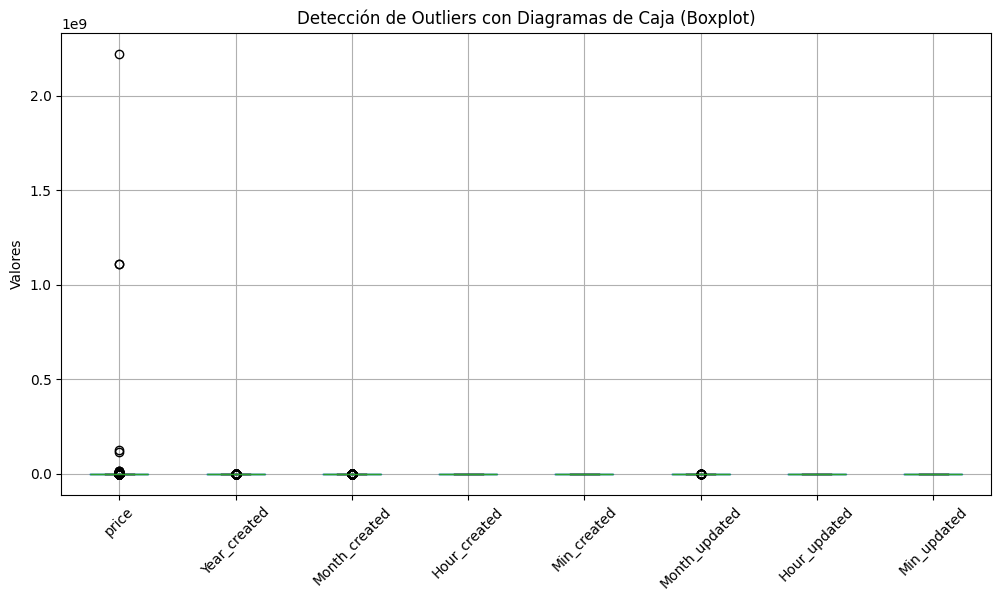

In [76]:
# Visualización de outliers con diagramas de caja
plt.figure(figsize=(12, 6))
df_new_2[columnas_numericas].boxplot()
plt.xticks(rotation=45)
plt.title("Detección de Outliers con Diagramas de Caja (Boxplot)")
plt.ylabel("Valores")
plt.show()

Eliminar outliers

In [77]:
# **Eliminar las filas con valores atípicos en las columnas seleccionadas**
df_cleaned = df_new_2.copy()  # Crear una copia para mantener df original

for col in columnas_numericas:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar solo las filas dentro de los límites aceptables
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# Resetear el índice después de eliminar filas atípicas
df_cleaned = df_cleaned.reset_index(drop=True)

# Mostrar el número de filas antes y después de eliminar outliers
print(f"Filas antes de eliminar outliers: {df_new_2.shape[0]}")
print(f"Filas después de eliminar outliers: {df_cleaned.shape[0]}")

Filas antes de eliminar outliers: 97591
Filas después de eliminar outliers: 83308


Guardar datasets. Se guardan dos datsets, uno sin outliers con un enfoque más preparado para el modelo de machine learning y uno con outliers ya que es bien sabido que se debe hacer un entrenamiento considerando ambos escenarios para poder tomar decisiones en cuanto a su permanencia o eliminación.

In [44]:
# Guardar el DataFrame limpio en un archivo CSV
df_cleaned.to_csv("dataset_limpio.csv", index=False)

# Guardar el DataFrame con otuliers en un archivo CSV
df_new_2.to_csv("dataset_outliers.csv", index=False)

print(df_cleaned.shape)
print(df_new_2.shape)

(83308, 19)
(97591, 19)
